<a href="https://colab.research.google.com/github/lanyu0322/PUS2020_LYu/blob/master/HW11/hw11_Lan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Find the number of businesses in 2010 and 2000. This information is available at the zipcode level (see helper notebook in this repo NYC_business_census_data.ipynb and DATA.md).

In [4]:
import pandas as pd
import os


# Download 2000 business data.
!wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp00totals.zip

# Download 2010 business data.
!wget ftp://ftp.census.gov/econ2010/CBP_CSV/zbp10totals.zip

--2020-11-21 00:42:38--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp00totals.zip
           => ‘zbp00totals.zip.5’
Resolving ftp.census.gov (ftp.census.gov)... 148.129.75.35, 2610:20:2010:a09:1000:0:9481:4b23
Connecting to ftp.census.gov (ftp.census.gov)|148.129.75.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Econ2001_And_Earlier/CBP_CSV ... done.
==> SIZE zbp00totals.zip ... 628434
==> PASV ... done.    ==> RETR zbp00totals.zip ... done.
Length: 628434 (614K) (unauthoritative)

zbp00totals.zip.5   100%[===================>] 613.71K   916KB/s    in 0.7s    

2020-11-21 00:42:40 (916 KB/s) - ‘zbp00totals.zip.5’ saved [628434]

--2020-11-21 00:42:40--  ftp://ftp.census.gov/econ2010/CBP_CSV/zbp10totals.zip
           => ‘zbp10totals.zip.5’
Resolving ftp.census.gov (ftp.census.gov)... 148.129.75.35, 2610:20:2010:a09:1000:0:9481:4b23
Connecting to ftp.census.gov (ftp.census.gov)|148.129.75.35

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

# Unzip business data.

!unzip zbp00totals.zip 
!unzip zbp10totals.zip 



Archive:  zbp00totals.zip
replace zbp00totals.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: zbp00totals.txt         
Archive:  zbp10totals.zip
replace zbp10totals.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: zbp10totals.txt         


In [7]:

# Load data to pandas dataframes.
df00 = pd.read_csv('zbp00totals.txt', 
                   usecols=['ZIP', 'NAME', 'EST'])
df10 = pd.read_csv('zbp10totals.txt', 
                   usecols=['zip', 'name', 'est'])

# Rename columns in 2000 data.
df00.rename(columns={'NAME': 'name', 'ZIP': 'zip', 'EST': 'est'}, 
            inplace=True)

# Remove data outside of NY.
df00 = df00[df00.name.str[-2:] == 'NY']
df10 = df10[df10.name.str[-2:] == 'NY']

# Convert 'zip' to string.
df00['zip'] = df00['zip'].map(lambda x: "%05d"%x)
df10['zip'] = df10['zip'].map(lambda x: "%05d"%x)

# Set zip to index.
df00.set_index('zip', inplace=True)
df10.set_index('zip', inplace=True)

# Join business data on zip index.
biz = df00.join(df10, how='outer', lsuffix='2000', rsuffix='2010')

# Clean up dataframe columns.
biz.drop('name2010', axis=1, inplace=True)
biz.rename(columns={'name2000': 'name'}, inplace=True)
biz['est2000'] = biz.est2000.astype(float)

biz.sort_index().head(2), biz.sort_index().tail(2)

(                     name  est2000  est2010
 zip                                        
 00501      HOLTSVILLE, NY      1.0      2.0
 06390  FISHERS ISLAND, NY     38.0     40.0,
              name  est2000  est2010
 zip                                
 14904  ELMIRA, NY    216.0    199.0
 14905  ELMIRA, NY    121.0    105.0)

In [8]:
biz

,name,est2000,est2010
zip,,,
00501,"HOLTSVILLE, NY",1.0,2.0
06390,"FISHERS ISLAND, NY",38.0,40.0
10001,"NEW YORK, NY",7317.0,7241.0
10002,"NEW YORK, NY",2277.0,2872.0
10003,"NEW YORK, NY",3683.0,4113.0
...,...,...,...
14901,"ELMIRA, NY",541.0,486.0
14902,"ELMIRA, NY",46.0,25.0
14903,"ELMIRA, NY",265.0,254.0


# 2. Gather a zipcode shapefile and merge the number of businesses with the zipcode shapfile so as to obtain a geodataframe

In [9]:
!pip install geopandas


In [10]:
import geopandas as gpd

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:91: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [11]:
geo = gpd.read_file("/content/drive/My Drive/pus2020/ZIP_CODE_040114/ZIP_CODE_040114.shp")
geo = geo[["ZIPCODE", "geometry"]]

In [12]:
geo

,ZIPCODE,geometry
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...
258,10310,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,"POLYGON ((997731.761 219560.922, 997641.948 21..."


In [13]:
geobiz = geo.merge(biz, left_on = "ZIPCODE", right_on = "zip")

In [14]:
geobiz = geobiz.fillna(0)

# 3. Find the density of businesses by dividing the number of businesses by the area of the zipcode (remember the geospatial homeworkm HW3 and HW4 and the geospatial lab) and show them the density in a choroplath (a heatmap version of a geographical map where each zipcode (census tract later) is a different color based on the value of the feature you are mapping) for 2000 and 2010 (OPTIONALLY: also show the difference in business density between 2000 and 2010 in a map, this will help you make sure you are on the right track) - see notes on this in DATA.ipynb

In [15]:
import matplotlib.pyplot as plt
from numpy import math
import numpy as np

In [16]:
geometry = geobiz.geometry.to_crs(epsg=2263)
area = geometry.area*3.58701e-8
geobiz["area"] = area
geobiz["logarea"] = np.log10(area)
geobiz = geobiz[geobiz["area"] >= 0.05]

In [17]:
geobiz["density2000"] = geobiz["est2000"]/area
geobiz["density2010"] = geobiz["est2010"]/area
geobiz["diff"] = geobiz["density2010"] - geobiz["density2000"]

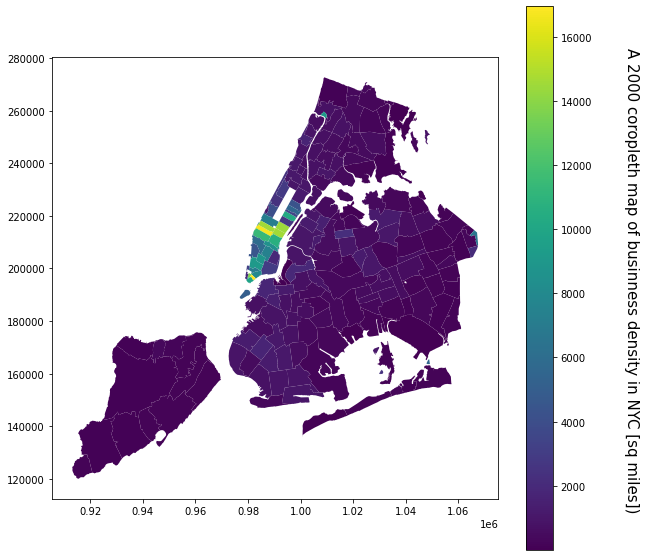

In [18]:
# -- make a choropleth
fig, ax = plt.subplots(figsize=[10, 10])
geobiz.plot("density2010", legend=True, ax=ax) 

fig.text(0.93, 0.5, "A 2000 coropleth map of businness density in NYC [sq miles])", ha="center", 
      va="center", rotation=-90, fontsize=15)
fig.show()

figure caption: the above figure shows  2000 business density in NYC [sq miles]. It indicates that the midtown manhattan has the highest business density(above 12000), and then followed by lower manhattan. It indicates that most of the businenss clustered in midtown and lower manhattan.

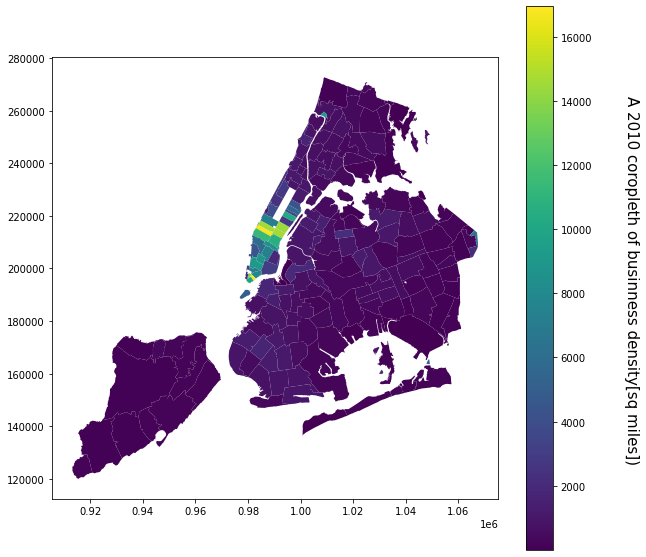

In [19]:
# -- make a choropleth
fig, ax = plt.subplots(figsize=[10, 10])
geobiz.plot("density2010", legend=True, ax=ax) 

fig.text(0.93, 0.5, "A 2010 coropleth of businness density[sq miles])", ha="center", 
      va="center", rotation=-90, fontsize=15)
fig.show()

figure caption: the above figure shows 2010 business density in NYC [sq miles]. It indicates that the midtown manhattan has the highest business density(above 12000), and then followed by lower manhattan. It indicates that most of the businenss clustered in midtown and lower manhattan.

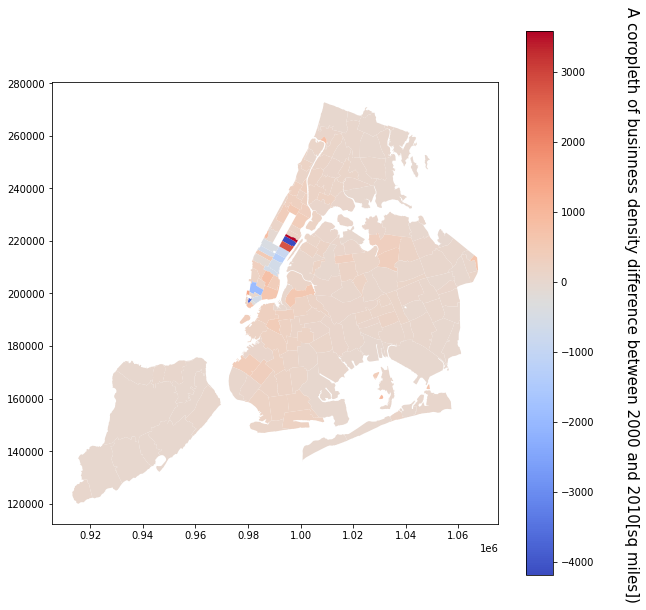

In [20]:
# -- make a choropleth
fig, ax = plt.subplots(figsize=[10, 10])
geobiz.plot("diff", legend=True, ax=ax, cmap="coolwarm") 

fig.text(0.93, 0.5, "A coropleth of businness density difference between 2000 and 2010[sq miles])", ha="center", 
      va="center", rotation=-90, fontsize=15)
fig.show()

figure caption: the above figure shows the difference of business dennsity between 2000 to 2010. It indicates that for most of the part, 2010 business density is higher than 2000 business density. However, there are two clear clusters has negative businenss difference. One is around central park, the other is in the lower manhattan. 

# 4. Collect census data from the 2010 and 2000 census and extract the estimate (mean or median) age, population, and diversity of each census tract for all 5 NYC boroughs. The diversity (or lack thereof) can be measured by the fraction of white population.

In [21]:
# Read raw data
census00 = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2020_FBianco/master/data/dec_00_sf1_dp1.csv")

In [22]:
# 2000 data

# Read raw data
census00 = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2020_FBianco/master/data/dec_00_sf1_dp1.csv")
# revise column names 
census00_sub = census00[['geo_id2', 'geo_display_label', 'hc01_vc01', 'hc01_vc18', 'hc02_vc48']]
census00_sub.rename(columns = {'geo_id2': 'id', 'geo_display_label': 'label', 'hc01_vc01': 'Population', 'hc01_vc18': 'MedianAge', 'hc02_vc48': 'PercWhite'}, inplace=True)
# fill n/a
census00_sub = census00_sub.fillna(0)
# set new columns
census00_sub["PercNotWhite"] = 100 - census00_sub.PercWhite
census00_sub["ctract_id"] = census00_sub.id.astype(str).str.slice(start=5, stop=11)
census00_sub["ctract_id2"] = census00_sub.id.astype(str).str.slice(start=6, stop=11)
# set 5 boroughs
bronx00 = census00_sub.loc[census00_sub["label"].str.contains("Bronx")]
kings00 = census00_sub.loc[census00_sub["label"].str.contains("Kings")]
nycounty00 = census00_sub.loc[census00_sub["label"].str.contains("New York County")]
queens00 = census00_sub.loc[census00_sub["label"].str.contains("Queens")]
richm00 = census00_sub.loc[census00_sub["label"].str.contains("Richmond")]
census00_sub = pd.concat([bronx00, kings00, nycounty00, queens00, richm00])

# print
census00_sub

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,label,Population,MedianAge,PercWhite,PercNotWhite,ctract_id,ctract_id2
2,36005003700,"Census Tract 37, Bronx County, New York",478,22.0,20.7,79.3,003700,03700
3,36005004900,"Census Tract 49, Bronx County, New York",246,30.0,25.6,74.4,004900,04900
4,36005005800,"Census Tract 58, Bronx County, New York",5,23.5,0.0,100.0,005800,05800
5,36005017100,"Census Tract 171, Bronx County, New York",3,47.5,0.0,100.0,017100,17100
6,36005018700,"Census Tract 187, Bronx County, New York",33,37.3,24.2,75.8,018700,18700
...,...,...,...,...,...,...,...,...
3965,36085030301,"Census Tract 303.01, Richmond County, New York",4836,34.4,71.5,28.5,030301,30301
3966,36085030302,"Census Tract 303.02, Richmond County, New York",6125,31.3,58.8,41.2,030302,30302
3967,36085031901,"Census Tract 319.01, Richmond County, New York",3262,23.0,18.8,81.2,031901,31901
3968,36085031902,"Census Tract 319.02, Richmond County, New York",4130,27.2,26.3,73.7,031902,31902


In [23]:
# 2010 data

# Read raw data
census10 = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2020_FBianco/master/data/dec_10_sf1_sf1dp1.csv")
# set column names 
census10_sub = census10[['geo_id2', 'geo_display_label', 'hd01_s001', 'hd01_s020', 'hd02_s100']]
census10_sub.rename(columns = {'geo_id2': 'id', 'geo_display_label': 'label', 'hd01_s001': 'Population', 'hd01_s020': 'MedianAge', 'hd02_s100': 'PercWhite'}, inplace=True)
# fill n/a
census10_sub = census10_sub.fillna(0)
# set new columns
census10_sub["PercNotWhite"] = 100 - census10_sub.PercWhite
census10_sub["ctract_id"] = census10_sub.id.astype(str).str.slice(start=5, stop=11)

# set 5 boroughs
bronx10 = census10_sub.loc[census10_sub["label"].str.contains("Bronx")]
kings10 = census10_sub.loc[census10_sub["label"].str.contains("Kings")]
nycounty10 = census10_sub.loc[census10_sub["label"].str.contains("New York County")]
queens10 = census10_sub.loc[census10_sub["label"].str.contains("Queens")]
richm10 = census10_sub.loc[census10_sub["label"].str.contains("Richmond")]
census10_sub = pd.concat([bronx10, kings10, nycounty10, queens10, richm10])

# print
census10_sub

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,label,Population,MedianAge,PercWhite,PercNotWhite,ctract_id
1,36005002400,"Census Tract 24, Bronx County, New York",4,38.0,50.0,50.0,002400
41,36005016300,"Census Tract 163, Bronx County, New York",0,0.0,0.0,100.0,016300
42,36005031900,"Census Tract 319, Bronx County, New York",751,20.5,70.6,29.4,031900
80,36005024900,"Census Tract 249, Bronx County, New York",0,0.0,0.0,100.0,024900
106,36005050400,"Census Tract 504, Bronx County, New York",39,41.8,41.0,59.0,050400
...,...,...,...,...,...,...,...
3964,36085030301,"Census Tract 303.01, Richmond County, New York",4929,36.6,62.7,37.3,030301
3965,36085030302,"Census Tract 303.02, Richmond County, New York",6369,33.7,48.2,51.8,030302
3966,36085031901,"Census Tract 319.01, Richmond County, New York",3265,27.7,21.2,78.8,031901
3967,36085031902,"Census Tract 319.02, Richmond County, New York",4848,28.0,23.3,76.7,031902


In [24]:
census00_sub.describe()

,id,Population,MedianAge,PercWhite,PercNotWhite
count,2.217000e+03,2217.000000,2217.000000,2217.000000,2217.000000
mean,3.605439e+10,3612.213802,34.135047,47.010104,52.989896
std,2.603490e+07,2463.233142,7.033842,31.451245,31.451245
min,3.600500e+10,0.000000,0.000000,0.000000,0.000000
25%,3.604702e+10,1916.000000,30.500000,18.900000,22.900000
50%,3.604712e+10,3149.000000,34.100000,44.900000,55.100000
75%,3.608103e+10,4675.000000,37.700000,77.100000,81.100000
max,3.608503e+10,24523.000000,87.200000,100.000000,100.000000


In [25]:
census10_sub.describe()

,id,Population,MedianAge,PercWhite,PercNotWhite
count,2.168000e+03,2168.000000,2168.000000,2168.000000,2168.000000
mean,3.605477e+10,3770.817804,35.678321,45.347878,54.652122
std,2.595090e+07,2178.134903,7.475306,29.752529,29.752529
min,3.600500e+10,0.000000,0.000000,0.000000,0.000000
25%,3.604703e+10,2256.750000,32.000000,19.500000,26.875000
50%,3.604712e+10,3426.000000,35.500000,42.050000,57.950000
75%,3.608103e+10,4814.000000,39.400000,73.125000,80.500000
max,3.608599e+10,26588.000000,84.500000,100.000000,100.000000


# 5. Collect the income data by census tract from the income from American Fact Finder for the years 2010 and 2000 at the census tract level.

In [26]:
!pip install census
!pip install CensusData
!pip install us

In [27]:
myAPIkey =  pd.read_csv("/content/drive/My Drive/myapis.csv")["census"]

In [28]:
import censusdata
from census import Census
from us import states
c = Census(myAPIkey)


In [29]:
#Bronx county (bronx10) number is 005
bronx_income10 = censusdata.download('acs5', 2010, censusdata.censusgeo([('state', '36'), ('county', '005'), ('tract', '*')]), ["B19013_001E"])
#Brooklyn county (kings10) number is 047
kings_income10 = censusdata.download('acs5', 2010, censusdata.censusgeo([('state', '36'), ('county', '047'), ('tract', '*')]), ["B19013_001E"])
#Manhattan county (nycounty10) number is 061
nycounty_income10 = censusdata.download('acs5', 2010, censusdata.censusgeo([('state', '36'), ('county', '061'), ('tract', '*')]), ["B19013_001E"])
#Queens county (queens10) number is 081
queens_income10 = censusdata.download('acs5', 2010, censusdata.censusgeo([('state', '36'), ('county', '081'), ('tract', '*')]), ["B19013_001E"])
#Staten Island (richm10) number is 085
richm_income10 = censusdata.download('acs5', 2010, censusdata.censusgeo([('state', '36'), ('county', '085'), ('tract', '*')]), ["B19013_001E"])

In [30]:
income10 = pd.concat([bronx_income10, kings_income10, nycounty_income10, queens_income10, richm_income10])
income10["median_income"] = income10["B19013_001E"].clip(0,1e9).dropna()
income10

,B19013_001E,median_income
"Census Tract 215.02, Bronx County, New York: Summary level: 140, state:36> county:005> tract:021502",24181,24181
"Census Tract 216.01, Bronx County, New York: Summary level: 140, state:36> county:005> tract:021601",26016,26016
"Census Tract 216.02, Bronx County, New York: Summary level: 140, state:36> county:005> tract:021602",46672,46672
"Census Tract 217, Bronx County, New York: Summary level: 140, state:36> county:005> tract:021700",17722,17722
"Census Tract 218, Bronx County, New York: Summary level: 140, state:36> county:005> tract:021800",33131,33131
...,...,...
"Census Tract 303.02, Richmond County, New York: Summary level: 140, state:36> county:085> tract:030302",75724,75724
"Census Tract 319.01, Richmond County, New York: Summary level: 140, state:36> county:085> tract:031901",30492,30492
"Census Tract 319.02, Richmond County, New York: Summary level: 140, state:36> county:085> tract:031902",44412,44412
"Census Tract 323, Richmond County, New York: Summary level: 140, state:36> county:085> tract:032300",27600,27600


In [31]:
def state(cname):
  return cname.split(', state:')[1].split('>')[0]
income10["state"] = income10.index.astype(str).map(state)

def county(cname):
  return cname.split('county:')[1].split('>')[0]
income10["county"] = income10.index.astype(str).map(county)

def tract(cname):
  return cname.split('tract:')[1]
income10["tract"] = income10.index.astype(str).map(tract)

income10["geoid"] = income10["state"] + income10["county"] + income10["tract"]
income10 = income10[["median_income", "geoid"]]
income10

,median_income,geoid
"Census Tract 215.02, Bronx County, New York: Summary level: 140, state:36> county:005> tract:021502",24181,36005021502
"Census Tract 216.01, Bronx County, New York: Summary level: 140, state:36> county:005> tract:021601",26016,36005021601
"Census Tract 216.02, Bronx County, New York: Summary level: 140, state:36> county:005> tract:021602",46672,36005021602
"Census Tract 217, Bronx County, New York: Summary level: 140, state:36> county:005> tract:021700",17722,36005021700
"Census Tract 218, Bronx County, New York: Summary level: 140, state:36> county:005> tract:021800",33131,36005021800
...,...,...
"Census Tract 303.02, Richmond County, New York: Summary level: 140, state:36> county:085> tract:030302",75724,36085030302
"Census Tract 319.01, Richmond County, New York: Summary level: 140, state:36> county:085> tract:031901",30492,36085031901
"Census Tract 319.02, Richmond County, New York: Summary level: 140, state:36> county:085> tract:031902",44412,36085031902
"Census Tract 323, Richmond County, New York: Summary level: 140, state:36> county:085> tract:032300",27600,36085032300


In [32]:
def borough(cname):
  return cname.split(', ')[1].split(' County,')[0]
income10["borough"] = income10.index.astype(str).map(borough)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
income10

,median_income,geoid,borough
"Census Tract 215.02, Bronx County, New York: Summary level: 140, state:36> county:005> tract:021502",24181,36005021502,Bronx County
"Census Tract 216.01, Bronx County, New York: Summary level: 140, state:36> county:005> tract:021601",26016,36005021601,Bronx County
"Census Tract 216.02, Bronx County, New York: Summary level: 140, state:36> county:005> tract:021602",46672,36005021602,Bronx County
"Census Tract 217, Bronx County, New York: Summary level: 140, state:36> county:005> tract:021700",17722,36005021700,Bronx County
"Census Tract 218, Bronx County, New York: Summary level: 140, state:36> county:005> tract:021800",33131,36005021800,Bronx County
...,...,...,...
"Census Tract 303.02, Richmond County, New York: Summary level: 140, state:36> county:085> tract:030302",75724,36085030302,Richmond County
"Census Tract 319.01, Richmond County, New York: Summary level: 140, state:36> county:085> tract:031901",30492,36085031901,Richmond County
"Census Tract 319.02, Richmond County, New York: Summary level: 140, state:36> county:085> tract:031902",44412,36085031902,Richmond County
"Census Tract 323, Richmond County, New York: Summary level: 140, state:36> county:085> tract:032300",27600,36085032300,Richmond County


In [34]:
# read 2000 income data
bx00 = pd.read_csv("/content/drive/MyDrive/pus2020/income2000/bx.csv", skiprows=5)
bk00 = pd.read_csv("/content/drive/MyDrive/pus2020/income2000/bk.csv", skiprows=6)
mn00 = pd.read_csv("/content/drive/MyDrive/pus2020/income2000/mn.csv", skiprows=6)
qn00 = pd.read_csv("/content/drive/MyDrive/pus2020/income2000/qn.csv", skiprows=6)
si00 = pd.read_csv("/content/drive/MyDrive/pus2020/income2000/si.csv", skiprows=6)


In [35]:
bx00

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,Bronx,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,$0,NaN
1,NaN,Bronx,200,"1,123",206,44,47,39,53,92,66,46,29,87,178,121,38,52,25,0,"$42,539",NaN
2,NaN,Bronx,400,"1,047",125,90,35,84,23,111,63,75,42,90,116,130,29,25,9,0,"$39,013",NaN
3,NaN,Bronx,500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,$0,NaN
4,NaN,Bronx,1100,126,6,13,36,4,17,0,9,0,7,20,8,0,0,0,6,0,"$25,588",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,NaN,Bronx,46202,"2,341",298,146,136,106,193,177,131,149,137,249,183,291,73,31,33,8,"$39,345",NaN
351,NaN,Bronx,48400,"1,199",100,31,33,53,16,19,69,80,59,173,107,209,138,68,41,3,"$57,853",NaN
352,NaN,Bronx,50200,308,34,8,16,9,0,25,20,14,11,0,57,37,52,19,6,0,"$63,333",NaN
353,NaN,Bronx,50400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,$0,NaN


In [36]:
# subset columnns
bx00 = bx00[["Unnamed: 1", "Unnamed: 2", "Unnamed: 20"]]
bk00 = bk00[["Unnamed: 1", "Unnamed: 2", "Unnamed: 20"]]
mn00 = mn00[["Unnamed: 1", "Unnamed: 2", "Unnamed: 20"]]
qn00 = qn00[["Unnamed: 1", "Unnamed: 2", "Unnamed: 20"]]
si00 = si00[["Unnamed: 1", "Unnamed: 2", "Unnamed: 20"]]

In [37]:
# combine all the boroughs
frames = [bx00, bk00, mn00, qn00, si00]
income00 =  pd.concat(frames)
income00.columns = ["borough", "census_tract", "median_income"]
# remove dollar and common sign
income00["census_tract"] = income00["census_tract"].astype(str)
income00['median_income'] = income00['median_income'].str.replace(',', '').str.replace('$', '').astype(int)


In [38]:
# keep all the cennsus tract data format same
tract00 = []
for i in range(len(income00)):
  if len(income00["census_tract"].iloc[i]) == 3:
    ct = "000" + income00["census_tract"].iloc[i]
  if len(income00["census_tract"].iloc[i]) == 4:
    ct = "00" + income00["census_tract"].iloc[i]
  if len(income00["census_tract"].iloc[i]) == 5:
    ct = "0" + income00["census_tract"].iloc[i]
  if len(income00["census_tract"].iloc[i]) == 6:
    ct = income00["census_tract"].iloc[i]
  tract00.append(ct)

income00["tract"] = tract00

In [39]:
# generate geoid
id00 = []
for i in range(len(income00)):
  if income00["borough"].iloc[i] == "Bronx":
    idi = "36005" + income00["tract"].iloc[i]
  if income00["borough"].iloc[i] == "Staten Island":
    idi = "36085" + income00["tract"].iloc[i]
  if income00["borough"].iloc[i] == "Manhattan":
    idi = "36061" + income00["tract"].iloc[i]
  if income00["borough"].iloc[i] == "Brooklyn":
    idi = "36047" + income00["tract"].iloc[i]
  if income00["borough"].iloc[i] == "Queens":
    idi= "36081" + income00["tract"].iloc[i]
  id00.append(idi)

income00["id"] = id00
   

In [40]:
income00

,borough,census_tract,median_income,tract,id
0,Bronx,100,0,000100,36005000100
1,Bronx,200,42539,000200,36005000200
2,Bronx,400,39013,000400,36005000400
3,Bronx,500,0,000500,36005000500
4,Bronx,1100,25588,001100,36005001100
...,...,...,...,...,...
105,Staten Island,30301,55921,030301,36085030301
106,Staten Island,30302,54559,030302,36085030302
107,Staten Island,31901,29310,031901,36085031901
108,Staten Island,31902,36949,031902,36085031902


In [41]:
# generate geoid
id00 = []
for i in range(len(income00)):
  if income00["borough"].iloc[i] == "Bronx":
    idi = "36005" + income00["tract"].iloc[i]
  if income00["borough"].iloc[i] == "Staten Island":
    idi = "36085" + income00["tract"].iloc[i]
  if income00["borough"].iloc[i] == "Manhattan":
    idi = "36061" + income00["tract"].iloc[i]
  if income00["borough"].iloc[i] == "Brooklyn":
    idi = "36047" + income00["tract"].iloc[i]
  if income00["borough"].iloc[i] == "Queens":
    idi= "36081" + income00["tract"].iloc[i]
  id00.append(idi)

income00["id"] = id00
   

In [42]:
# check length of geoid
idx = []
for i in range(len(income00)):
  income00["id"] = income00["id"].astype(str)
  if len(income00["id"].iloc[i]) == 11:
    idi = income00["id"]
    idx.append(idi)
len(idx)

2217

# 6. Merge the census datasets for each year and show a the tables containing the relevant data: the features and whatever else you need to identify and plot the data.

In [43]:
income10["geoid"] = income10["geoid"].astype(int)
data10 = census10_sub.merge(income10, left_on = "id", right_on="geoid")
data10.isnull().sum()
data10["median_income"] = data10["median_income"].clip(lower=0)
data10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,label,Population,MedianAge,PercWhite,PercNotWhite,ctract_id,median_income,geoid,borough
0,36005002400,"Census Tract 24, Bronx County, New York",4,38.0,50.0,50.0,002400,0,36005002400,Bronx County
1,36005016300,"Census Tract 163, Bronx County, New York",0,0.0,0.0,100.0,016300,0,36005016300,Bronx County
2,36005031900,"Census Tract 319, Bronx County, New York",751,20.5,70.6,29.4,031900,0,36005031900,Bronx County
3,36005024900,"Census Tract 249, Bronx County, New York",0,0.0,0.0,100.0,024900,0,36005024900,Bronx County
4,36005050400,"Census Tract 504, Bronx County, New York",39,41.8,41.0,59.0,050400,0,36005050400,Bronx County
...,...,...,...,...,...,...,...,...,...,...
2163,36085030301,"Census Tract 303.01, Richmond County, New York",4929,36.6,62.7,37.3,030301,67431,36085030301,Richmond County
2164,36085030302,"Census Tract 303.02, Richmond County, New York",6369,33.7,48.2,51.8,030302,75724,36085030302,Richmond County
2165,36085031901,"Census Tract 319.01, Richmond County, New York",3265,27.7,21.2,78.8,031901,30492,36085031901,Richmond County
2166,36085031902,"Census Tract 319.02, Richmond County, New York",4848,28.0,23.3,76.7,031902,44412,36085031902,Richmond County


In [44]:
data10 = data10.drop(columns = [ "ctract_id", "geoid", "label"])


In [45]:
data10

,id,Population,MedianAge,PercWhite,PercNotWhite,median_income,borough
0,36005002400,4,38.0,50.0,50.0,0,Bronx County
1,36005016300,0,0.0,0.0,100.0,0,Bronx County
2,36005031900,751,20.5,70.6,29.4,0,Bronx County
3,36005024900,0,0.0,0.0,100.0,0,Bronx County
4,36005050400,39,41.8,41.0,59.0,0,Bronx County
...,...,...,...,...,...,...,...
2163,36085030301,4929,36.6,62.7,37.3,67431,Richmond County
2164,36085030302,6369,33.7,48.2,51.8,75724,Richmond County
2165,36085031901,3265,27.7,21.2,78.8,30492,Richmond County
2166,36085031902,4848,28.0,23.3,76.7,44412,Richmond County


In [46]:
income00["id"] = income00["id"].astype(int)
data00 = census00_sub.merge(income00, left_on = "id", right_on="id")
data00.isnull().sum()
data00["median_income"] = data00["median_income"].clip(lower=0)
data00

,id,label,Population,MedianAge,PercWhite,PercNotWhite,ctract_id,ctract_id2,borough,census_tract,median_income,tract
0,36005003700,"Census Tract 37, Bronx County, New York",478,22.0,20.7,79.3,003700,03700,Bronx,3700,23750,003700
1,36005004900,"Census Tract 49, Bronx County, New York",246,30.0,25.6,74.4,004900,04900,Bronx,4900,25662,004900
2,36005005800,"Census Tract 58, Bronx County, New York",5,23.5,0.0,100.0,005800,05800,Bronx,5800,6250,005800
3,36005017100,"Census Tract 171, Bronx County, New York",3,47.5,0.0,100.0,017100,17100,Bronx,17100,0,017100
4,36005018700,"Census Tract 187, Bronx County, New York",33,37.3,24.2,75.8,018700,18700,Bronx,18700,0,018700
...,...,...,...,...,...,...,...,...,...,...,...,...
2212,36085030301,"Census Tract 303.01, Richmond County, New York",4836,34.4,71.5,28.5,030301,30301,Staten Island,30301,55921,030301
2213,36085030302,"Census Tract 303.02, Richmond County, New York",6125,31.3,58.8,41.2,030302,30302,Staten Island,30302,54559,030302
2214,36085031901,"Census Tract 319.01, Richmond County, New York",3262,23.0,18.8,81.2,031901,31901,Staten Island,31901,29310,031901
2215,36085031902,"Census Tract 319.02, Richmond County, New York",4130,27.2,26.3,73.7,031902,31902,Staten Island,31902,36949,031902


In [47]:
data00 = data00.drop(columns = ["label", "ctract_id", "ctract_id2", "census_tract", "tract"])

In [48]:
data00

,id,Population,MedianAge,PercWhite,PercNotWhite,borough,median_income
0,36005003700,478,22.0,20.7,79.3,Bronx,23750
1,36005004900,246,30.0,25.6,74.4,Bronx,25662
2,36005005800,5,23.5,0.0,100.0,Bronx,6250
3,36005017100,3,47.5,0.0,100.0,Bronx,0
4,36005018700,33,37.3,24.2,75.8,Bronx,0
...,...,...,...,...,...,...,...
2212,36085030301,4836,34.4,71.5,28.5,Staten Island,55921
2213,36085030302,6125,31.3,58.8,41.2,Staten Island,54559
2214,36085031901,3262,23.0,18.8,81.2,Staten Island,29310
2215,36085031902,4130,27.2,26.3,73.7,Staten Island,36949


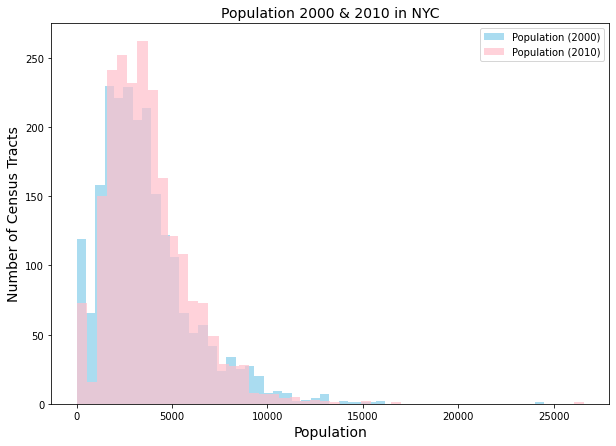

In [49]:
# Population
fig, ax = plt.subplots(figsize=[10,7])
ax.hist(data00["Population"], bins=50, color="skyblue", alpha=0.7, label="Population (2000)")
ax.hist(data10["Population"], bins=50, color="pink", alpha=0.7, label="Population (2010)")
ax.set_xlabel("Population", fontsize=14)
ax.set_ylabel("Number of Census Tracts", fontsize=14)
plt.title("Population 2000 & 2010 in NYC", fontsize=14)
ax.legend()
fig.show()

Figure caption: the above histogram shows the distributionn of population in NYC, it indicates the population distribution in 2000 and 2010 were concenntrated between 0 to 50000. Overall, the 2010 population cluster between 0 to 5000 is higher than it in 2000.

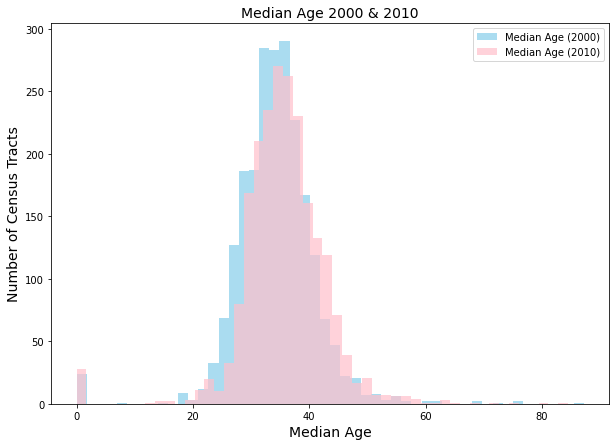

In [50]:
# Median age
fig, ax = plt.subplots(figsize=[10,7])
ax.hist(data00["MedianAge"], bins=50, color="skyblue", alpha=0.7, label="Median Age (2000)")
ax.hist(data10["MedianAge"], bins=50, color="pink", alpha=0.7, label="Median Age (2010)")
ax.set_xlabel("Median Age", fontsize=14)
ax.set_ylabel("Number of Census Tracts", fontsize=14)
plt.title("Median Age 2000 & 2010", fontsize=14)
ax.legend()
fig.show()

Figure Caption: the above histogram shows the distributionn of mediann age in NYC. It shows that median age is concenntraated between 30 to 40 both in 2000 and 2010. Overall, the median age from 2000 to 2010 is increasng for each census tract. 

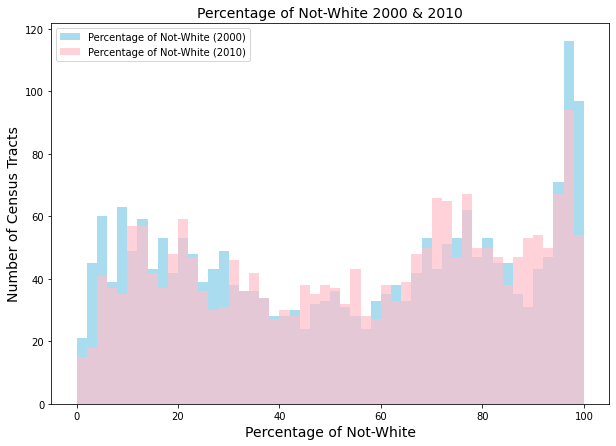

In [51]:
# Percentage Not White
fig, ax = plt.subplots(figsize=[10,7])
ax.hist(data00["PercNotWhite"], bins=50, color="skyblue", alpha=0.7, label="Percentage of Not-White (2000)")
ax.hist(data10["PercNotWhite"], bins=50, color="pink", alpha=0.7, label="Percentage of Not-White (2010)")
ax.set_xlabel("Percentage of Not-White", fontsize=14)
ax.set_ylabel("Number of Census Tracts", fontsize=14)
plt.title("Percentage of Not-White 2000 & 2010", fontsize=14)
ax.legend()
fig.show()

Figure Caption: the above histogram shows the distributionn of percentage of not-white in NYC(2000 and 2010). It shows that the percentage of not-white varies from different census tract. Moreover, it does have some places has 0 or 100 not-white percentage both in 2000 and 2010.

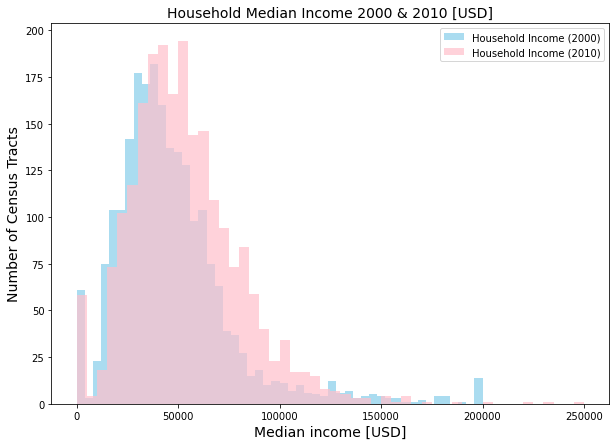

In [52]:
# Income
fig, ax = plt.subplots(figsize=[10,7])
ax.hist(data00["median_income"], bins=50, color="skyblue", alpha=0.7, label="Household Income (2000)")
ax.hist(data10["median_income"], bins=50, color="pink", alpha=0.7, label="Household Income (2010)")
ax.set_xlabel("Median income [USD]", fontsize=14)
ax.set_ylabel("Number of Census Tracts", fontsize=14)
plt.title("Household Median Income 2000 & 2010 [USD]", fontsize=14)
ax.legend()
fig.show()

Figure Caption: the above histogram shows the distributionn of household median income with unit USD in NYC(2000 and 2010). The household median income in 2010 is higher than it is in 2000 (between 35000 to 60000). 


In [53]:
pop00 = data00["Population"].groupby([data00.borough]).sum()
pop10 = data10["Population"].groupby([data10.borough]).sum()

age00 = data00["MedianAge"].groupby([data00.borough]).sum()
age10 = data10["MedianAge"].groupby([data10.borough]).sum()

notwhite00 = data00["PercNotWhite"].groupby([data00.borough]).sum()
notwhite10 = data10["PercNotWhite"].groupby([data10.borough]).sum()

inc00 = data00["median_income"].groupby([data00.borough]).sum()
inc10 = data10["median_income"].groupby([data10.borough]).sum()

Text(0.5, 0, 'Borough name')

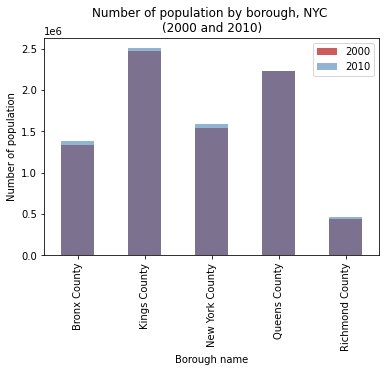

In [54]:
ax = pop00.plot(kind="bar", color = "IndianRed", label= "2000")
ax = pop10.plot(kind="bar", color = "SteelBlue", label= "2010", alpha = 0.6)
plt.legend();
plt.title("Number of population by borough, NYC \n(2000 and 2010)")
plt.ylabel("Number of population")
plt.xlabel("Borough name")

Figure Caption: the above figure shows the number of populationn by borough in NYC in 2010 are all higher than the number of populationn by borough in NYC in 2000.





Text(0.5, 0, 'Borough name')

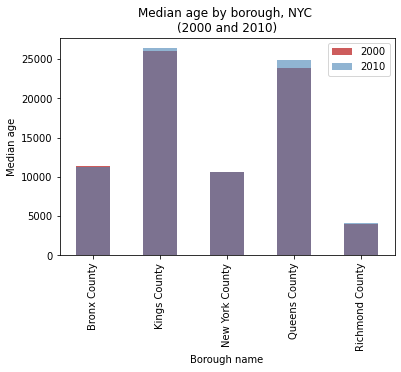

In [55]:
ax = age00.plot(kind="bar", color = "IndianRed", label= "2000")
ax = age10.plot(kind="bar", color = "SteelBlue", label= "2010", alpha = 0.6)
plt.legend();
plt.title("Median age by borough, NYC \n(2000 and 2010)")
plt.ylabel("Median age")
plt.xlabel("Borough name")

Figure Caption: the above figure shows the median age in four boroughs(Kings, New York, Queenns, Richmond) in NYC in 2010 is higher than it is in NYC in 2000. For the Bronx county, the median age in 2010 is smaller than it is in 2000.

Text(0.5, 0, 'Borough name')

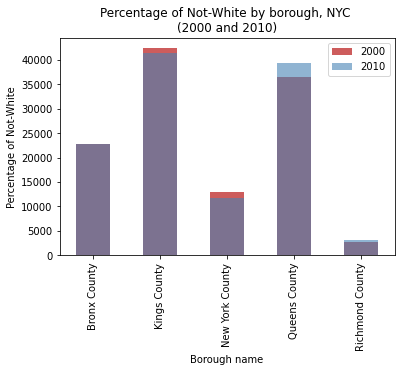

In [56]:
ax = notwhite00.plot(kind="bar", color = "IndianRed", label= "2000")
ax = notwhite10.plot(kind="bar", color = "SteelBlue", label= "2010", alpha = 0.6)
plt.legend();
plt.title("Percentage of Not-White by borough, NYC \n(2000 and 2010)")
plt.ylabel("Percentage of Not-White")
plt.xlabel("Borough name")

Figure Caption: the above figure shows the not-white percentage in Kings, annd New York in 2000 is higher than it is in 2010. For the Queenns, and Richmond, the not-white percentage in 2000 is smaller than it is in 2010. For the Bronx, they are almost same. 

# 7. Merge the df with the census tracts shapefile so as to obtain a geodataframe (see DATA and HINTS files) and display each of your features as a choropleth for both 2010 and 2000, and show the difference in the features as a third choroplath.

In [57]:
ctract = gpd.read_file("https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=Shapefile")
ctract

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,5,5000900,Staten Island,E,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((-74.07921 40.64343, -74.07914 40.643..."
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
2,1,1010000,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,"POLYGON ((-73.96802 40.75958, -73.96848 40.758..."
3,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
4,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76229, -73.97491 40.761..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2160,4,4021200,Queens,I,021200,212,QN61,Jamaica,4112,2.536196e+06,8201.875265,"POLYGON ((-73.81153 40.70227, -73.81083 40.702..."
2161,4,4107201,Queens,I,107201,1072.01,QN10,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,4114,1.553053e+07,35194.224948,"POLYGON ((-73.81653 40.61495, -73.81655 40.614..."
2162,4,4107202,Queens,I,107202,1072.02,QN99,park-cemetery-etc-Queens,4114,7.178839e+07,182384.827557,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
2163,5,5022600,Staten Island,I,022600,226,SI11,Charleston-Richmond Valley-Tottenville,3901,8.623340e+07,54954.350950,"POLYGON ((-74.20700 40.55757, -74.20880 40.557..."


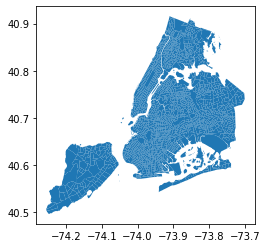

In [58]:
ctract.plot()

In [59]:
# generate geoid
geoid = []
for i in range(len(ctract)):
  if ctract["boro_name"].iloc[i] == "Bronx":
    idi = "36005" + ctract["ct2010"].iloc[i]
  if ctract["boro_name"].iloc[i] == "Staten Island":
    idi = "36085" + ctract["ct2010"].iloc[i]
  if ctract["boro_name"].iloc[i] == "Manhattan":
    idi = "36061" + ctract["ct2010"].iloc[i]
  if ctract["boro_name"].iloc[i] == "Brooklyn":
    idi = "36047" + ctract["ct2010"].iloc[i]
  if ctract["boro_name"].iloc[i] == "Queens":
    idi= "36081" + ctract["ct2010"].iloc[i]
  geoid.append(idi)

ctract["id"] = geoid
   

In [60]:
ctract = ctract[["id", "geometry"]]

In [61]:
ctract["id"] = ctract["id"].astype(int)
ctract_data00 = ctract.merge(data00, left_on="id", right_on = "id")
ctract_data10 = ctract.merge(data10, left_on="id", right_on = "id")

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:1109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [62]:
ctract_data00

,id,geometry,Population,MedianAge,PercWhite,PercNotWhite,borough,median_income
0,36085000900,"POLYGON ((-74.07921 40.64343, -74.07914 40.643...",2109,33.2,43.1,56.9,Staten Island,36184
1,36061009800,"POLYGON ((-73.96433 40.75638, -73.96479 40.755...",7066,37.8,87.0,13.0,Manhattan,110122
2,36061010000,"POLYGON ((-73.96802 40.75958, -73.96848 40.758...",1822,37.9,87.5,12.5,Manhattan,86744
3,36061010200,"POLYGON ((-73.97124 40.76094, -73.97170 40.760...",269,48.1,95.5,4.5,Manhattan,200001
4,36061010400,"POLYGON ((-73.97446 40.76229, -73.97491 40.761...",1097,47.3,87.2,12.8,Manhattan,143775
...,...,...,...,...,...,...,...,...
1923,36081021200,"POLYGON ((-73.81153 40.70227, -73.81083 40.702...",2701,31.6,26.2,73.8,Queens,27411
1924,36081107201,"POLYGON ((-73.81653 40.61495, -73.81655 40.614...",2630,35.8,98.1,1.9,Queens,61742
1925,36081107202,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...",0,0.0,0.0,100.0,Queens,0
1926,36085022600,"POLYGON ((-74.20700 40.55757, -74.20880 40.557...",6103,34.4,82.5,17.5,Staten Island,65818


In [63]:
data_00to10 = data00.merge(data10, left_on="id", right_on = "id")
ctract_data_00to10 = ctract.merge(data_00to10, left_on="id", right_on = "id")

In [64]:
ctract_data_00to10["diff_Population"] = ctract_data_00to10["Population_y"] - ctract_data_00to10["Population_x"] 
ctract_data_00to10["diff_MedianAge"] = ctract_data_00to10["MedianAge_y"] - ctract_data_00to10["MedianAge_x"] 
ctract_data_00to10["diff_PercNotWhite"] = ctract_data_00to10["PercNotWhite_y"] - ctract_data_00to10["PercNotWhite_x"] 
ctract_data_00to10["diff_median_income"] = ctract_data_00to10["median_income_y"] - ctract_data_00to10["median_income_x"] 

In [65]:
ctract_data_00to10

,id,geometry,Population_x,MedianAge_x,PercWhite_x,PercNotWhite_x,borough_x,median_income_x,Population_y,MedianAge_y,PercWhite_y,PercNotWhite_y,median_income_y,borough_y,diff_Population,diff_MedianAge,diff_PercNotWhite,diff_median_income
0,36085000900,"POLYGON ((-74.07921 40.64343, -74.07914 40.643...",2109,33.2,43.1,56.9,Staten Island,36184,2112,34.2,39.7,60.3,56192,Richmond County,3,1.0,3.4,20008
1,36061009800,"POLYGON ((-73.96433 40.75638, -73.96479 40.755...",7066,37.8,87.0,13.0,Manhattan,110122,7316,37.5,83.4,16.6,101191,New York County,250,-0.3,3.6,-8931
2,36061010000,"POLYGON ((-73.96802 40.75958, -73.96848 40.758...",1822,37.9,87.5,12.5,Manhattan,86744,1992,38.2,76.8,23.2,82488,New York County,170,0.3,10.7,-4256
3,36061010200,"POLYGON ((-73.97124 40.76094, -73.97170 40.760...",269,48.1,95.5,4.5,Manhattan,200001,230,47.0,79.1,20.9,41809,New York County,-39,-1.1,16.4,-158192
4,36061010400,"POLYGON ((-73.97446 40.76229, -73.97491 40.761...",1097,47.3,87.2,12.8,Manhattan,143775,966,49.9,84.3,15.7,85455,New York County,-131,2.6,2.9,-58320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,36081021200,"POLYGON ((-73.81153 40.70227, -73.81083 40.702...",2701,31.6,26.2,73.8,Queens,27411,2754,32.1,24.9,75.1,36484,Queens County,53,0.5,1.3,9073
1924,36081107201,"POLYGON ((-73.81653 40.61495, -73.81655 40.614...",2630,35.8,98.1,1.9,Queens,61742,2443,40.4,96.4,3.6,80435,Queens County,-187,4.6,1.7,18693
1925,36081107202,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...",0,0.0,0.0,100.0,Queens,0,0,0.0,0.0,100.0,0,Queens County,0,0.0,0.0,0
1926,36085022600,"POLYGON ((-74.20700 40.55757, -74.20880 40.557...",6103,34.4,82.5,17.5,Staten Island,65818,8490,37.5,85.9,14.1,77240,Richmond County,2387,3.1,-3.4,11422


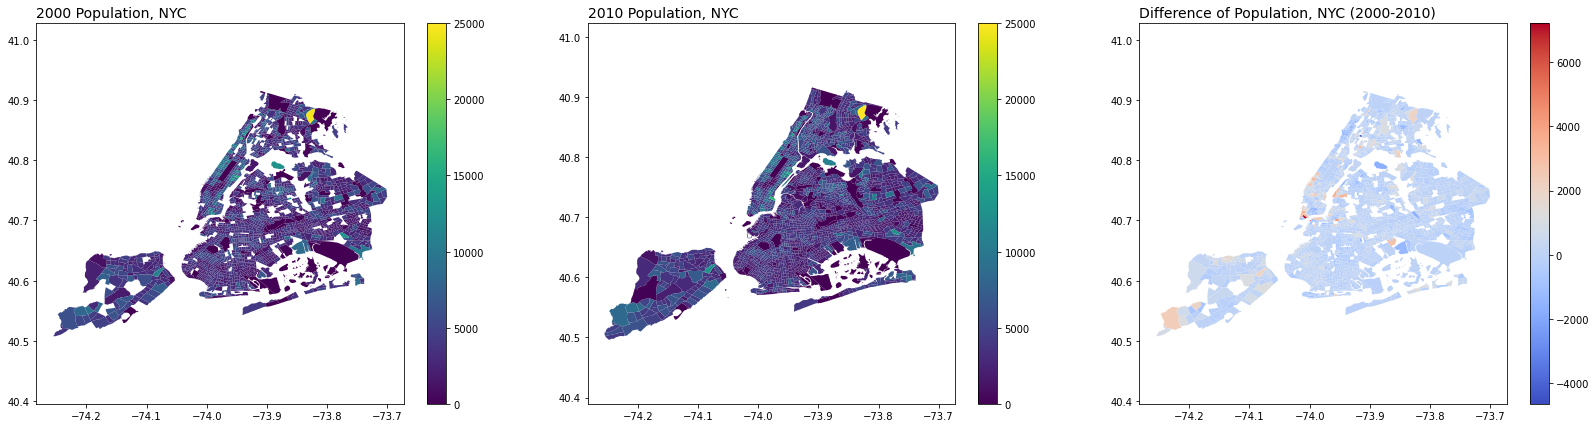

In [66]:
# Population
fig, ax = plt.subplots(1,3, figsize=[28,7])
plot0 = ax[0]
plot1 = ax[1]
plot2 = ax[2]

ctract_data00.plot("Population", legend=True, vmin=0, vmax=25000, ax=plot0)
ax[0].axis("equal")
ax[0].set_title("2000 Population, NYC", loc="left", fontsize=14)


ctract_data10.plot("Population", legend=True, vmin=0, vmax=25000, ax=plot1)
ax[1].axis("equal")
ax[1].set_title("2010 Population, NYC", loc="left", fontsize=14)


ctract_data_00to10.plot("diff_Population", legend=True, ax=plot2, cmap="coolwarm")
ax[2].axis("equal")
ax[2].set_title("Difference of Population, NYC (2000-2010)", loc="left", fontsize=14)



fig.show()

Figure Caption: from the left to the right, the 2000 population map inndicates that there is one census tract area in Bronx county has the highest number population(around 25000), then followed by most of the area in Manhattan and Staten islannd. The 2010 population map indicates that there is one census tract area in Bronx county has the highest number population, then followed by most of the area in Manhattan and Staten islannd. 

For the difference of population between 2000 to 2010, overall the population is decreasing. But for some area, such as lower manhattan, southwest of Staten Island, the population in 2010 is higher than it is in 2000.


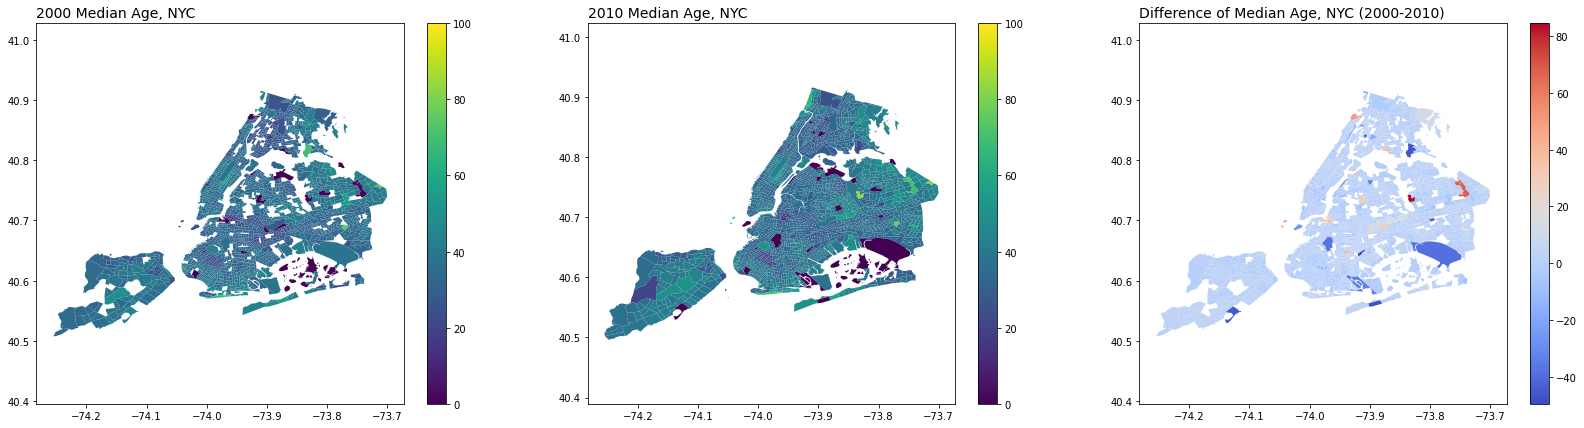

In [67]:
# Median Age
fig, ax = plt.subplots(1,3, figsize=[28,7])
plot0 = ax[0]
plot1 = ax[1]
plot2 = ax[2]

ctract_data00.plot("MedianAge", legend=True, vmin=0, vmax=100, ax=plot0)
ax[0].axis("equal")
ax[0].set_title("2000 Median Age, NYC", loc="left", fontsize=14)


ctract_data10.plot("MedianAge", legend=True, vmin=0, vmax=100, ax=plot1)
ax[1].axis("equal")
ax[1].set_title("2010 Median Age, NYC", loc="left", fontsize=14)


ctract_data_00to10.plot("diff_MedianAge", legend=True, ax=plot2, cmap="coolwarm")
ax[2].axis("equal")
ax[2].set_title("Difference of Median Age, NYC (2000-2010)", loc="left", fontsize=14)


fig.show()

Figure Caption: from the left to the right, the 2000 median age map inndicates that the mediann age in most of the area in nyc is aroud 40. The 2010 median age map indicates that overall the the mediann age in most of the area in nyc is aroud 40 but in some area in south of Queens, the median age is around 10. 

For the difference of median age between 2000 to 2010, overall the population is decreasing, especially for the south of Queens. 

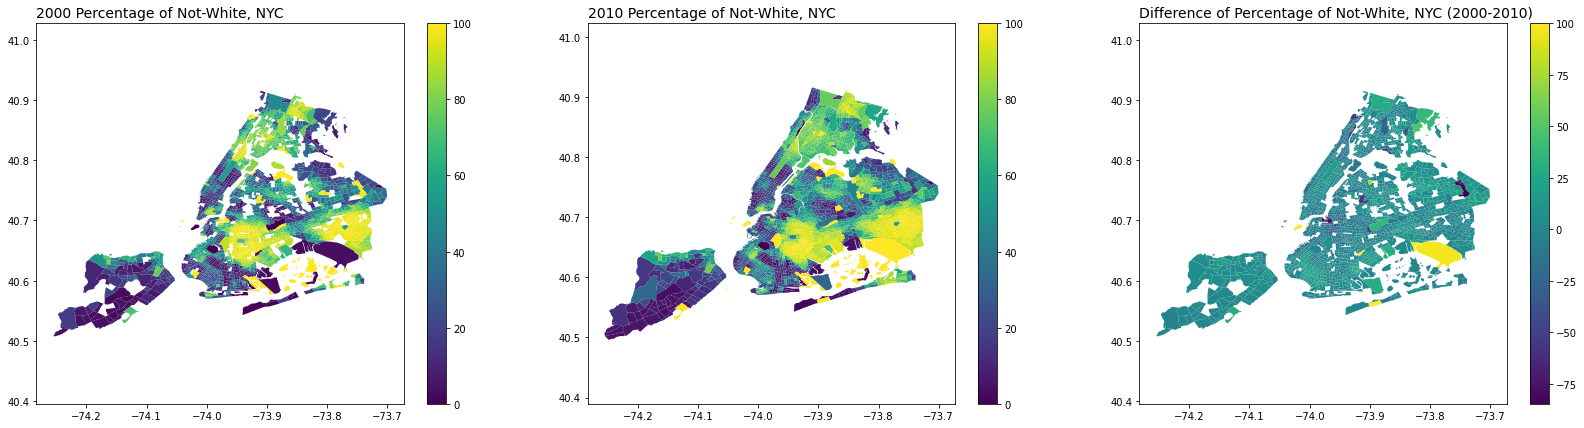

In [68]:
# Perc Not White
fig, ax = plt.subplots(1,3, figsize=[28,7])
plot0 = ax[0]
plot1 = ax[1]
plot2 = ax[2]

ctract_data00.plot("PercNotWhite", legend=True, vmin=0, vmax=100, ax=plot0)
ax[0].axis("equal")
ax[0].set_title("2000 Percentage of Not-White, NYC", loc="left", fontsize=14)


ctract_data10.plot("PercNotWhite", legend=True, vmin=0, vmax=100, ax=plot1)
ax[1].axis("equal")
ax[1].set_title("2010 Percentage of Not-White, NYC", loc="left", fontsize=14)


ctract_data_00to10.plot("diff_PercNotWhite", legend=True, ax=plot2)
ax[2].axis("equal")
ax[2].set_title("Difference of Percentage of Not-White, NYC (2000-2010)", loc="left", fontsize=14)



fig.show()

Figure Caption: from the left to the right, the 2000 percentage of not-white map inndicates that in Brooklyn, Queens, and Bronnx, the not-white percentage is higher. for the staten island, the not-white percentage is lower. The 2010 percentage of not-white map inndicates that in Brooklyn, Queens, and Bronnx, the not-white percentage is higher. for the staten island, the not-white percentage is lower. 

For the difference of not-white percentage between 2000 to 2010, overall the percentage is increasing, especially for the south of Queens.

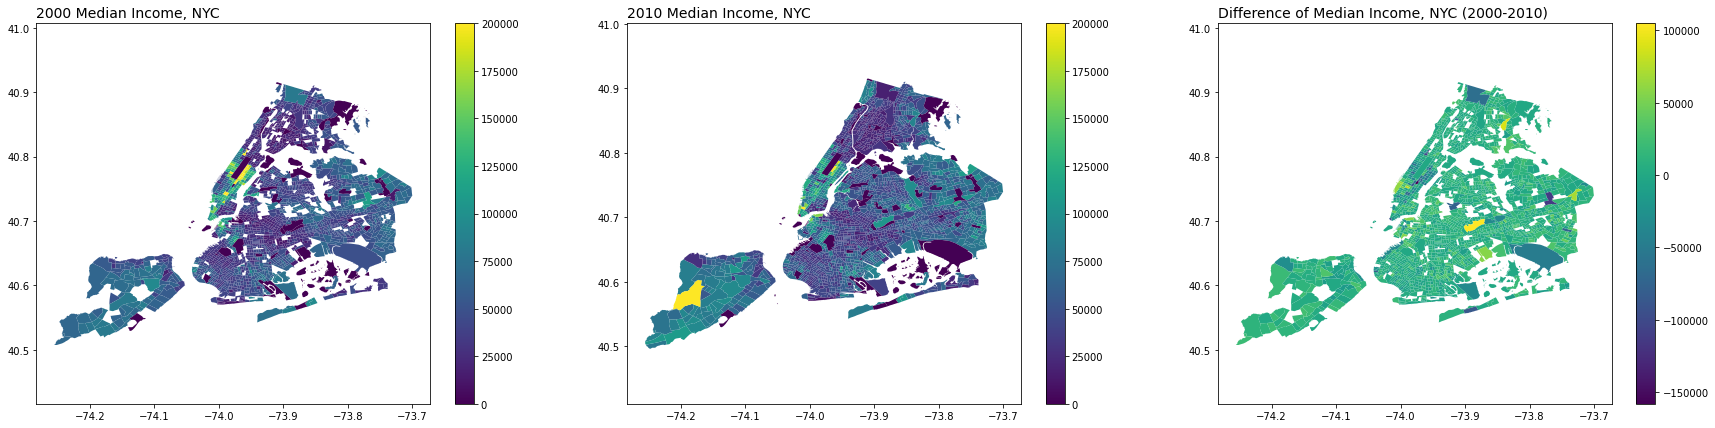

In [69]:
# Median Income
fig, ax = plt.subplots(1,3, figsize=[30,7])
plot0 = ax[0]
plot1 = ax[1]
plot2 = ax[2]

ctract_data00.plot("median_income", legend=True, vmin=0, vmax=200000, ax=plot0)
ax[0].axis("equal")
ax[0].set_title("2000 Median Income, NYC", loc="left", fontsize=14)


ctract_data10.plot("median_income", legend=True, vmin=0, vmax=200000, ax=plot1)
ax[1].axis("equal")
ax[1].set_title("2010 Median Income, NYC", loc="left", fontsize=14)


ctract_data_00to10.plot("diff_median_income", legend=True, ax=plot2)
ax[2].axis("equal")
ax[2].set_title("Difference of Median Income, NYC (2000-2010)", loc="left", fontsize=14)



fig.show()

Figure Caption: from the left to the right, the 2000 household median income map inndicates that manhattan has the highest median income, espically area arounnd central park. The 2010 household median income map inndicates that Staten Island has the highest median income.
For the difference of not-white percentage between 2000 to 2010, overall the household income is increasing.

# 8. Aggregate the census four features at the zipcode level and merge the zipcode dataframe - see helper notebook spatial_joint_of_census_tracts_and_zipcode.ipynb

In [70]:
!apt install libspatialindex-c4v5
!pip install pysal

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-c4v5 is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [71]:

!apt install python3-rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [72]:
import pysal as ps


In [73]:
import geopandas as gpd

In [74]:
!wget https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip

--2020-11-21 00:44:06--  https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip [following]
--2020-11-21 00:44:06--  https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip
Reusing existing connection to data.cityofnewyork.us:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘application%2Fzip.10’

application%2Fzip.1     [ <=>                ]   1.44M  8.90MB/s    in 0.2s    

2020-11-21 00:44:07 (8.90 MB/s) - ‘application%2Fzip.10’ saved [1514401]



In [75]:
!unzip application%2Fzip

Archive:  application%2Fzip
replace ZIP_CODE_040114.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ZIP_CODE_040114.shx     
replace ZIP_CODE_040114.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ZIP_CODE_040114.dbf     
replace ZIP_CODE_040114.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ZIP_CODE_040114.prj     
replace ZIP_CODE_040114.sbn? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ZIP_CODE_040114.sbn     
replace ZIP_CODE_040114.sbx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ZIP_CODE_040114.sbx     
replace ZIP_CODE_040114.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ZIP_CODE_040114.shp     
replace ZIP_CODE_040114.shp.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ZIP_CODE_040114.shp.xml  


In [76]:

censustract = gpd.GeoDataFrame.from_file(
    "https://data.cityofnewyork.us/api/geospatial/" + 
    "fxpq-c8ku?method=export&format=GeoJSON")
censustract.head()

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ..."
1,MN19,1906016.35002,Turtle Bay-East Midtown,5534.19981063,Manhattan,3808,009800,1,I,1009800,98,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ..."
2,MN19,1860938.37721,Turtle Bay-East Midtown,5692.16873705,Manhattan,3808,010000,1,I,1010000,100,"MULTIPOLYGON (((-73.96802 40.75958, -73.96848 ..."
3,MN17,1860992.70485,Midtown-Midtown South,5687.80243866,Manhattan,3807,010200,1,I,1010200,102,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ..."
4,MN17,1864600.37503,Midtown-Midtown South,5693.03636655,Manhattan,3807,010400,1,I,1010400,104,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ..."


In [77]:
zipcode = gpd.GeoDataFrame.from_file("ZIP_CODE_040114.shp")
zipcode

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


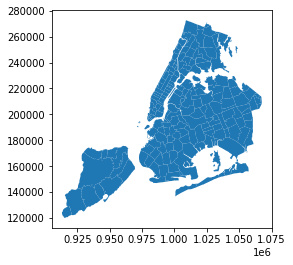

In [78]:
zipcode.plot()

In [79]:
# Convert census tract data to centroid geometry.
censustract['geometry'] = censustract.geometry.centroid
# Reset index of zipcodes for spatial join.
censustract.reset_index(inplace=True)
zipcode.reset_index(inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [80]:
zipcode = gpd.sjoin(left_df=censustract[["shape_leng",	"boro_name",	"ct2010", "geometry", "boro_ct2010"]],
             right_df=zipcode[["ZIPCODE", "geometry", "ST_FIPS", "CTY_FIPS"]].to_crs(censustract.crs),
             how='right', op='intersects', 
             lsuffix='00', rsuffix='zc')

In [81]:
zipcode

,index_00,shape_leng,boro_name,ct2010,boro_ct2010,ZIPCODE,geometry,ST_FIPS,CTY_FIPS
0,409.0,6323.59663386,Queens,019000,4019000,11436,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",36,081
0,573.0,6955.46452797,Queens,018800,4018800,11436,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",36,081
0,575.0,8038.55967977,Queens,019200,4019200,11436,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",36,081
0,1168.0,7150.59389471,Queens,018402,4018402,11436,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",36,081
0,1180.0,7087.16640819,Queens,018200,4018200,11436,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",36,081
...,...,...,...,...,...,...,...,...,...
260,1862.0,7343.45091916,Brooklyn,055500,3055500,11249,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",36,047
260,1867.0,6845.7755595,Brooklyn,054900,3054900,11249,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",36,047
260,1881.0,7122.6772057,Brooklyn,055100,3055100,11249,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",36,047
261,996.0,5904.30055105,Manhattan,013200,1013200,10162,"POLYGON ((-73.95133 40.76931, -73.95165 40.769...",36,061


In [82]:

zipcode['id'] = zipcode['ST_FIPS'].astype(str) + zipcode['CTY_FIPS'].astype(str) + zipcode['ct2010'].astype(str)
zipcode = zipcode.dropna()
zipcode

,index_00,shape_leng,boro_name,ct2010,boro_ct2010,ZIPCODE,geometry,ST_FIPS,CTY_FIPS,id
0,409.0,6323.59663386,Queens,019000,4019000,11436,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",36,081,36081019000
0,573.0,6955.46452797,Queens,018800,4018800,11436,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",36,081,36081018800
0,575.0,8038.55967977,Queens,019200,4019200,11436,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",36,081,36081019200
0,1168.0,7150.59389471,Queens,018402,4018402,11436,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",36,081,36081018402
0,1180.0,7087.16640819,Queens,018200,4018200,11436,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",36,081,36081018200
...,...,...,...,...,...,...,...,...,...,...
260,1609.0,5664.39969841,Brooklyn,054700,3054700,11249,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",36,047,36047054700
260,1862.0,7343.45091916,Brooklyn,055500,3055500,11249,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",36,047,36047055500
260,1867.0,6845.7755595,Brooklyn,054900,3054900,11249,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",36,047,36047054900
260,1881.0,7122.6772057,Brooklyn,055100,3055100,11249,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",36,047,36047055100


# 9. Merge all zipcode level df

In [101]:
ctract_data00

,id,geometry,Population,MedianAge,PercWhite,PercNotWhite,borough,median_income
0,36085000900,"POLYGON ((-74.07921 40.64343, -74.07914 40.643...",2109,33.2,43.1,56.9,Staten Island,36184
1,36061009800,"POLYGON ((-73.96433 40.75638, -73.96479 40.755...",7066,37.8,87.0,13.0,Manhattan,110122
2,36061010000,"POLYGON ((-73.96802 40.75958, -73.96848 40.758...",1822,37.9,87.5,12.5,Manhattan,86744
3,36061010200,"POLYGON ((-73.97124 40.76094, -73.97170 40.760...",269,48.1,95.5,4.5,Manhattan,200001
4,36061010400,"POLYGON ((-73.97446 40.76229, -73.97491 40.761...",1097,47.3,87.2,12.8,Manhattan,143775
...,...,...,...,...,...,...,...,...
1923,36081021200,"POLYGON ((-73.81153 40.70227, -73.81083 40.702...",2701,31.6,26.2,73.8,Queens,27411
1924,36081107201,"POLYGON ((-73.81653 40.61495, -73.81655 40.614...",2630,35.8,98.1,1.9,Queens,61742
1925,36081107202,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...",0,0.0,0.0,100.0,Queens,0
1926,36085022600,"POLYGON ((-74.20700 40.55757, -74.20880 40.557...",6103,34.4,82.5,17.5,Staten Island,65818


In [ ]:
zipcode = gpd.sjoin(left_df=censustract[["shape_leng",	"boro_name",	"ct2010", "geometry", "boro_ct2010"]],
             right_df=zipcode[["ZIPCODE", "geometry", "ST_FIPS", "CTY_FIPS"]].to_crs(censustract.crs),
             how='right', op='intersects', 
             lsuffix='00', rsuffix='zc')

In [ ]:
# Convert census tract data to centroid geometry.
ctract_data00['geometry'] = ctract_data00.geometry.centroid
# Reset index of zipcodes for spatial join.
ctract_data00.reset_index(inplace=True)
zipcode.reset_index(inplace=True)


In [114]:

zip00 = gpd.sjoin(left_df=ctract_data00[["MedianAge", "PercWhite", "median_income", "geometry"]],
             right_df=zipcode[["ZIPCODE", "geometry"]].to_crs(censustract.crs),
             how='right', op='intersects', lsuffix='00', rsuffix='zc')

zip00 = zip00[["MedianAge", "PercWhite", "median_income", "geometry", "ZIPCODE"]]
zip00
#I dont understand why after using sjoin, the rows becames so much...

,MedianAge,PercWhite,median_income,geometry,ZIPCODE
0,32.0,1.8,37550.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
0,35.9,3.2,49722.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
0,35.9,2.0,52607.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
0,33.5,1.8,60357.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
0,31.7,2.9,38125.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
...,...,...,...,...,...
2158,18.5,76.7,16536.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249
2158,32.7,84.6,42344.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249
2158,29.2,55.2,26875.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249
2158,30.2,49.3,27139.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249


In [84]:
meangeobiz = geobiz.groupby("ZIPCODE").mean().reset_index()
meangeobiz = meangeobiz.drop(columns = ["area", "logarea"])

meangeobiz

,ZIPCODE,est2000,est2010,density2000,density2010,diff
0,10001,7317.0,7241.0,11463.148951,11344.083853,-119.065098
1,10002,2277.0,2872.0,2415.477282,3046.662606,631.185324
2,10003,3683.0,4113.0,6607.900606,7379.390495,771.489889
3,10004,1294.0,1398.0,6855.211578,7406.171396,550.959818
4,10005,1287.0,1266.0,17225.717128,16944.644820,-281.072307
...,...,...,...,...,...,...
180,11691,376.0,490.0,124.896233,162.763708,37.867475
181,11692,79.0,90.0,91.795395,104.577032,12.781637
182,11693,79.0,132.0,574.577041,960.052778,385.475737
183,11694,288.0,330.0,166.916902,191.258950,24.342048


In [115]:
# Convert census tract data to centroid geometry.
ctract_data10['geometry'] = ctract_data10.geometry.centroid
# Reset index of zipcodes for spatial join.
ctract_data10.reset_index(inplace=True)
zipcode.reset_index(inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [116]:


zip10 = gpd.sjoin(left_df=ctract_data00[["MedianAge", "PercWhite", "median_income", "geometry"]],
             right_df=zipcode[["ZIPCODE", "geometry"]].to_crs(censustract.crs),
             how='right', op='intersects', 
             lsuffix='00', rsuffix='zc')
zip10 = zip10[["MedianAge", "PercWhite", "median_income", "geometry", "ZIPCODE"]]

zip10
#I dont understand why after using sjoin, the rows becames so much...

,MedianAge,PercWhite,median_income,geometry,ZIPCODE
0,32.0,1.8,37550.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
0,35.9,3.2,49722.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
0,35.9,2.0,52607.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
0,33.5,1.8,60357.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
0,31.7,2.9,38125.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
...,...,...,...,...,...
2158,18.5,76.7,16536.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249
2158,32.7,84.6,42344.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249
2158,29.2,55.2,26875.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249
2158,30.2,49.3,27139.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249


In [117]:
zip00 = zip00.merge(meangeobiz, left_on="ZIPCODE", right_on = "ZIPCODE")
zip10 = zip10.merge(meangeobiz, left_on="ZIPCODE", right_on = "ZIPCODE")


In [118]:
zip00 = zip00[["density2000", "MedianAge", "PercWhite", "median_income", "geometry", "ZIPCODE"]]
zip10 = zip10[["density2010", "MedianAge", "PercWhite", "median_income", "geometry", "ZIPCODE"]]

In [119]:

zip00

,density2000,MedianAge,PercWhite,median_income,geometry,ZIPCODE
0,79.830415,32.0,1.8,37550.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
1,79.830415,35.9,3.2,49722.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
2,79.830415,35.9,2.0,52607.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
3,79.830415,33.5,1.8,60357.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
4,79.830415,31.7,2.9,38125.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
...,...,...,...,...,...,...
32437,0.000000,19.0,74.0,16102.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249
32438,0.000000,18.5,76.7,16536.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249
32439,0.000000,32.7,84.6,42344.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249
32440,0.000000,29.2,55.2,26875.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249


In [120]:
zip10

,density2010,MedianAge,PercWhite,median_income,geometry,ZIPCODE
0,120.359702,32.0,1.8,37550.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
1,120.359702,35.9,3.2,49722.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
2,120.359702,35.9,2.0,52607.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
3,120.359702,33.5,1.8,60357.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
4,120.359702,31.7,2.9,38125.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436
...,...,...,...,...,...,...
32437,47.059502,19.0,74.0,16102.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249
32438,47.059502,18.5,76.7,16536.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249
32439,47.059502,32.7,84.6,42344.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249
32440,47.059502,29.2,55.2,26875.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249


# 10. Cluster the census tracts on these four features (using a Eucledian distance and choosing whichever clustering model you want). Remember that before whitening you have to whiten (or standardize) the data

In [121]:
from sklearn.cluster import KMeans

In [122]:
# standardize
cluster00 = zip00[["density2000", "MedianAge", "PercWhite", "median_income"]].values
cluster00_st = (cluster00 - cluster00.mean(axis=1, keepdims=True)) / cluster00.std(axis=1, keepdims=True)
cluster00_st = pd.DataFrame(cluster00_st)

cluster10 = zip10[["density2010", "MedianAge", "PercWhite", "median_income"]].values
cluster10_st = (cluster10 - cluster10.mean(axis=1, keepdims=True)) / cluster10.std(axis=1, keepdims=True)
cluster10_st = pd.DataFrame(cluster10_st)

In [123]:

cluster00_st = cluster00_st.fillna(0).values
cluster10_st = cluster10_st.fillna(0).values

In [124]:
cluster10_st

array([[-0.57310041, -0.57854213, -0.58040203,  1.73204457],
       [-0.57422431, -0.57815133, -0.57967175,  1.73204739],
       [-0.5743784 , -0.57808982, -0.57957949,  1.7320477 ],
       ...,
       [-0.57777193, -0.5785561 , -0.57572185,  1.73204988],
       [-0.57707124, -0.57860843, -0.57637057,  1.73205024],
       [-0.57693484, -0.57837174, -0.57674389,  1.73205046]])

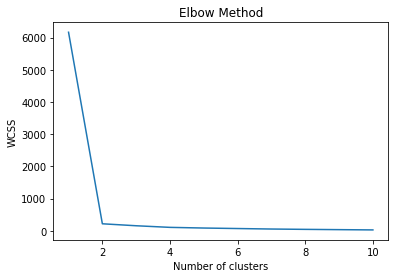

In [125]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cluster00_st)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

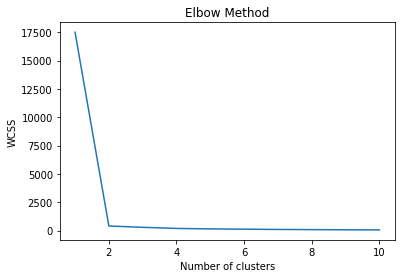

In [95]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cluster10_st)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [126]:
kmeans00 = KMeans(n_clusters=2, random_state=0).fit(cluster00_st)
pred00 = kmeans00.fit_predict(cluster00_st)
zip00["cluster"] = pred00
zip00

,density2000,MedianAge,PercWhite,median_income,geometry,ZIPCODE,cluster
0,79.830415,32.0,1.8,37550.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436,0
1,79.830415,35.9,3.2,49722.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436,0
2,79.830415,35.9,2.0,52607.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436,0
3,79.830415,33.5,1.8,60357.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436,0
4,79.830415,31.7,2.9,38125.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436,0
...,...,...,...,...,...,...,...
32437,0.000000,19.0,74.0,16102.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249,0
32438,0.000000,18.5,76.7,16536.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249,0
32439,0.000000,32.7,84.6,42344.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249,0
32440,0.000000,29.2,55.2,26875.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249,0


In [127]:
kmeans10 = KMeans(n_clusters=2, random_state=0).fit(cluster10_st)
pred10 = kmeans10.fit_predict(cluster10_st)
zip10["cluster"] = pred10
zip10

,density2010,MedianAge,PercWhite,median_income,geometry,ZIPCODE,cluster
0,120.359702,32.0,1.8,37550.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436,0
1,120.359702,35.9,3.2,49722.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436,0
2,120.359702,35.9,2.0,52607.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436,0
3,120.359702,33.5,1.8,60357.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436,0
4,120.359702,31.7,2.9,38125.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436,0
...,...,...,...,...,...,...,...
32437,47.059502,19.0,74.0,16102.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249,0
32438,47.059502,18.5,76.7,16536.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249,0
32439,47.059502,32.7,84.6,42344.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249,0
32440,47.059502,29.2,55.2,26875.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249,0


# 11. Identify the census tracts that have changed cluster assignment (those that are now associated with a different group of census tracts) and show a choropleth of the clusters in 2010, 2000 and a choropleth of the cluster changes. (Once you get through this, you have done most of the heavy lifting! The rest is building upon this work.)

In [128]:
cluster_diff = zip10.merge(zip00, left_on='ZIPCODE', right_on = 'ZIPCODE')
cluster_diff

,density2010,MedianAge_x,PercWhite_x,median_income_x,geometry_x,ZIPCODE,cluster_x,density2000,MedianAge_y,PercWhite_y,median_income_y,geometry_y,cluster_y
0,120.359702,32.0,1.8,37550.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436,0,79.830415,32.0,1.8,37550.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",0
1,120.359702,32.0,1.8,37550.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436,0,79.830415,35.9,3.2,49722.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",0
2,120.359702,32.0,1.8,37550.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436,0,79.830415,35.9,2.0,52607.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",0
3,120.359702,32.0,1.8,37550.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436,0,79.830415,33.5,1.8,60357.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",0
4,120.359702,32.0,1.8,37550.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",11436,0,79.830415,31.7,2.9,38125.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15429399,47.059502,30.2,49.3,27139.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249,0,0.000000,19.0,74.0,16102.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",0
15429400,47.059502,30.2,49.3,27139.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249,0,0.000000,18.5,76.7,16536.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",0
15429401,47.059502,30.2,49.3,27139.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249,0,0.000000,32.7,84.6,42344.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",0
15429402,47.059502,30.2,49.3,27139.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",11249,0,0.000000,29.2,55.2,26875.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",0


In [99]:
cluster_diff["diff"] = cluster_diff["cluster_x"] - cluster_diff["cluster_y"]
diff = cluster_diff[["diff", "geometry_x_x"]]
diff.rename(columnns = {"geometry_x_x": "geometry"})

KeyError: ignored

In [ ]:
# cluster
fig, ax = plt.subplots(1,3, figsize=[30,7])
plot0 = ax[0]
plot1 = ax[1]
plot2 = ax[2]

zip10.plot("cluster", legend=True, ax=plot0)
ax[0].axis("equal")
ax[0].set_title("2000 Clusters, NYC", loc="left", fontsize=14)


zip00.plot("cluster", legend=True, ax=plot0)
ax[0].axis("equal")
ax[0].set_title("2010 Clusters, NYC", loc="left", fontsize=14)


diff.plot("diff", legend=True, ax=plot2)
ax[2].axis("equal")
ax[2].set_title("Changes in Clusters, NYC (2000-2010)", loc="left", fontsize=14)


# 12. Define a function that given a dataframe containing the relevant information and two cluster labels finds if the census tract changed cluster assignments from the first to the second label, and if so finds the individual features that are significantly different as measured by Pearson's correlation, plot those zip codes, and plot a histogram of the features that have significantly changed. Run your function for all label pairs (2 points, one for the identification of locations that changed cluster and one for the identifiation of the features that changed significantly).